In [1]:
import pandas as pd
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import warnings


Bad key "text.kerning_factor" on line 4 in
/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


import pandas as pd
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# Analysis

## Analyzing Game Data in ways that can't be done with Tableau

### How many goals would be scored if every period was on the far side?

In [2]:
# import goal data 
goal_df = pd.read_csv("../data/goals.csv", index_col=0)

In [3]:
goal_df.describe()

,period,goal,game_id
count,19509.000000,19509.000000,1.950900e+04
mean,2.038546,1.500948,2.014164e+09
std,0.807395,0.747878,2.648608e+06
min,1.000000,1.000000,2.010020e+09
25%,1.000000,1.000000,2.012020e+09
50%,2.000000,1.000000,2.014021e+09
75%,3.000000,2.000000,2.017020e+09
max,3.000000,7.000000,2.018030e+09


#### Only 2nd period

In [4]:
# only 2nd period
goal_2nd_per = goal_df[goal_df['period'] == 2]
goal_2nd_per['goals_per_60'] = goal_2nd_per['goal'] * 3

/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


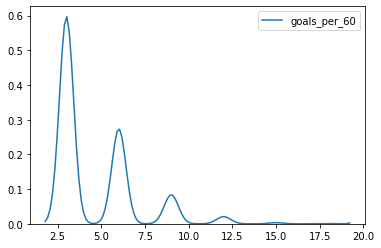

In [5]:
sns.kdeplot(goal_2nd_per['goals_per_60'])

In [6]:
# average num of goals
goal_2nd_per['goals_per_60'].mean()

4.596037261570309

#### Only 1st Period

In [7]:
goal_1st_per = goal_df[goal_df['period'] == 1]
goal_1st_per['goals_per_60'] = goal_1st_per['goal'] * 3

/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


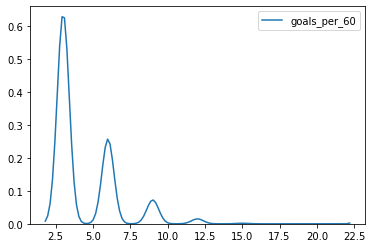

In [8]:
sns.kdeplot(goal_1st_per['goals_per_60'])

In [9]:
goal_1st_per['goals_per_60'].mean()

4.377688844422211

#### Average Number of Goals per Game per Year

In [10]:
goal_df.head(10)

,period,goal,game_id
0,3,1,2011030221
1,1,1,2011030111
2,2,1,2011030111
3,3,2,2011030111
4,3,2,2011030222
5,1,1,2011030223
6,3,1,2011030223
7,1,1,2011030224
8,3,1,2011030224
9,1,1,2011030225


In [11]:
test_game_id = goal_df['game_id'][0]

In [12]:
goal_df['season'] = goal_df['game_id'] // (10**6)

In [13]:
season_goals = goal_df.groupby(['season']).goal.mean() * 3
season_period_goals = goal_df.groupby(['season', 'period']).goal.mean()

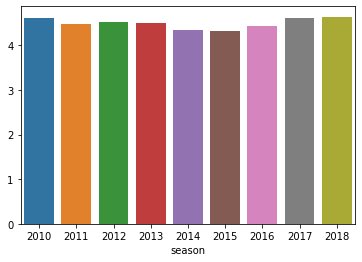

In [14]:
sns.barplot(x = season_goals.index, y = season_goals.values)

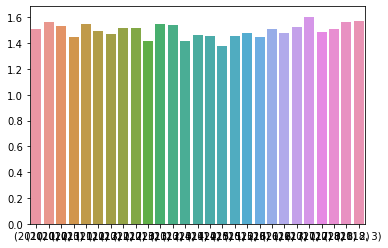

In [15]:
sns.barplot(x = season_period_goals.index, y = season_period_goals.values)

In [16]:
# viewing second period for each year 
goal_2nd_per['season'] = goal_2nd_per['game_id'] // (10**6)
season_2nd_period_goals = goal_2nd_per.groupby(['season']).goal.mean() 
season_2nd_period_goals_per_60 = goal_2nd_per.groupby(['season']).goal.mean() * 3

/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


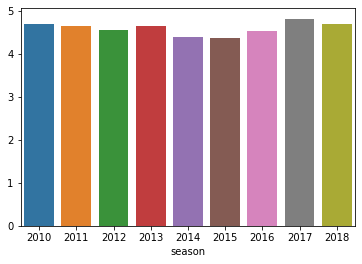

In [18]:
sns.barplot(x = season_2nd_period_goals_per_60.index, y= season_2nd_period_goals_per_60.values)

#### Increase in goals per year

In [19]:
increase_goals_w_long_change = season_2nd_period_goals_per_60.values - season_goals.values

In [24]:
increase_goals_w_long_change_rounded = [round(x, 2) for x in increase_goals_w_long_change]
increase_goals_w_long_change_rounded

[0.08, 0.16, 0.05, 0.13, 0.05, 0.03, 0.09, 0.2, 0.04]

In [25]:
increase_goals_w_long_change_rounded[0] * 12

0.96

In [26]:
sum (increase_goals_w_long_change_rounded) / len(increase_goals_w_long_change_rounded)

0.09222222222222223

In [28]:
# one more goal scored every 10.8 games
1 / 0.092

10.869565217391305